# Deep Learning Convolution

## What is Convolution

Convolution is a process of applying filter or kernel on the input data and produces an output. The output can be of 3 types.

- Smaller Size Output Matrix -  
- Same Size Output Matrix    - This is achieved through padding.
- Bigger Size Output Matrix  - This is done through transpose convolution.

Kernel size is generally of odd no of matrix size. Example 3x3, or 5x5 or 7x7

## Convolution in 2D Images

![Convolution With Kernel](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/01_conv.jpg)

A 3x3 shape kernel is applied to the input image pixels, the output is a **dot product** of kernel and input pixel matrix as highlighed above. The output after applying the dot product is below:

![Convolution Output](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/02_conv.jpg)

**Please note the numbers are not an actual dot product multiplication and is only for visual purpose.**

## Manual Implementation Of Convolution Kernel Dot Product

We will use a real image and apply manual dot product multiplication to see the output and later we will use scipy library for convolution and finally we will use pytorch for the same and analyze the results.

### Import Sample Image

In [1]:
# to read an image from a url
import imageio
# image
url = 'https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/1530340798737.jpg'
img = imageio.v2.imread(url)
# check the size
print(img.shape)

(413, 413, 3)


The sample image is of size 413x413 pixels and 3 layer since this is a colored image. 

### Convert image to greyscale

In [2]:
# import numpy
import numpy as np

# transform image to 2D for convenience (not necessary for convolution!)
img_2d = np.mean(img,axis=2)
img_2d = img_2d/np.max(img_2d)
print(img_2d.shape)

(413, 413)


### Let's see the image and the kernel

C:\Users\DELL\AppData\Local\Temp\ipykernel_5952\3732094565.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


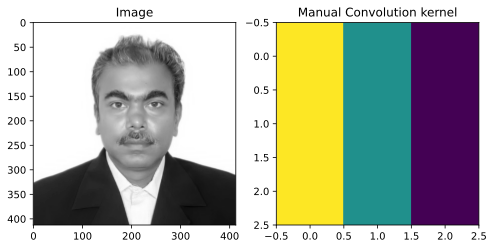

In [3]:
# import matplot lib for visualization
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
display.set_matplotlib_formats('svg')

# vertical kernel
kernel = np.array([ [1,0,-1],
                    [1,0,-1],
                    [1,0,-1] ])

# let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(8,6))


ax[0].imshow(img_2d,cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Manual Convolution kernel')

plt.show()


### Manual Implement Dot Product of Image & Kernel

In [4]:
def calcconv2d(img,kernel):
    imagelength = img.shape[0]
    imagewidth  = img.shape[1]
    # var to store the response.
    response = np.zeros((imagelength,imagewidth))
    halfKr = kernel.shape[0]//2
    
    # iterator over each row
    for rowi in range(halfKr,imagelength-halfKr):
        for coli in range(halfKr,imagewidth-halfKr):
            # cut out a piece of the image
            pieceOfImg = img[rowi-halfKr:rowi+halfKr+1,:]
            pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1]
            # dot product:
            dotprod = np.sum( pieceOfImg*kernel[::-1,::-1] )
            # store the result for this pixel
            response[rowi,coli] = dotprod
    return response
    

In [5]:
myconvres = calcconv2d(img_2d,kernel)
print(myconvres.shape)

(413, 413)


### Using Scipy to calculate convoutput

In [6]:
# using scipy
# convolution
from scipy.signal import convolve2d

scipyconvres = convolve2d(img_2d,kernel,mode='valid')
print(scipyconvres.shape)

(411, 411)


### Check Scipy and Our Implementation Convolution Output

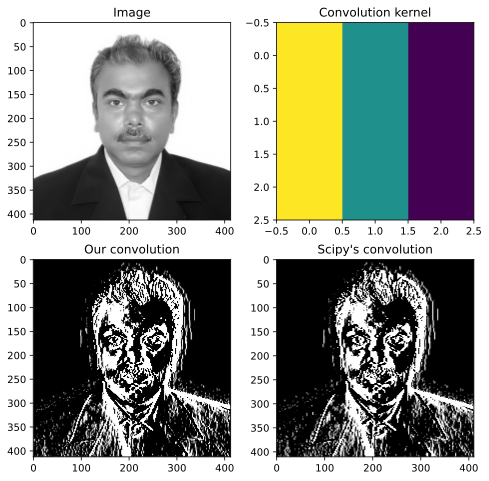

In [7]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(img_2d,cmap='gray')
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(myconvres,cmap='gray',vmin=0,vmax=.01)
ax[1,0].set_title('Our convolution')

ax[1,1].imshow(scipyconvres,cmap='gray',vmin=0,vmax=.01)
ax[1,1].set_title("Scipy's convolution")

plt.show()

Fairly close with the difference of 2 pixels in shape. Check the size food for thought...

### Handcraft horizontal and vertical kernel

In [8]:
# hand-craft two convolution kernels

# vertical kernel
vertical = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
horizontal = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

### Apply Scipy convolution and see result

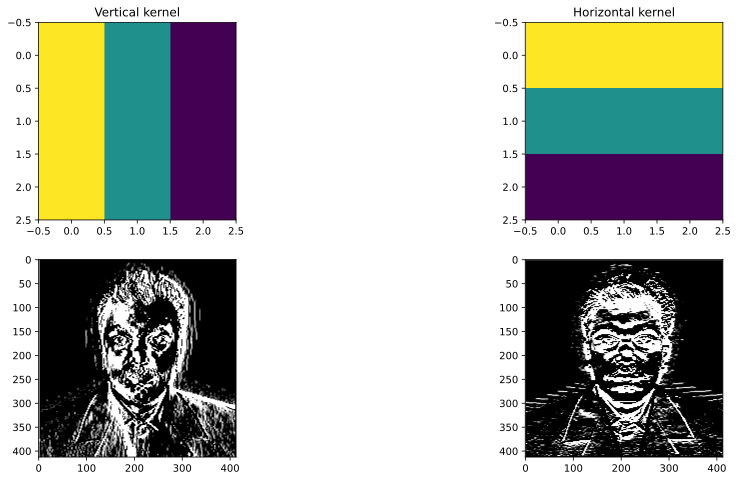

In [9]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(vertical)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(horizontal)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = convolve2d(img_2d,vertical,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres = convolve2d(img_2d,horizontal,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)

plt.show()

## Using Pytorch for Convolution

### Convert input data to tensors

Reshaping the kernel's and image, pytorch expects it to be 4 dimensional tensor, these dimensions are:

- noOfInputs = 1 , in this case we have 1 image, 1 kernel
- channels   = 1 , (since grey scale, if color image then this value will be 3
- height     = 3 , 3 for kernel and 413 for image
- width      = 3 , 3 for kernel and 413 for image

In [10]:
# first, translate everything into a tensor
import torch
import torch.nn.functional as F

# reshaping the kernel's and image, pytorch expects it to be 4 dimensional tensor
vertical_t = torch.tensor(vertical).view(1,1,3,3).double()
horizontal_t = torch.tensor(horizontal).view(1,1,3,3).double()
img_2d__t = torch.tensor(img_2d).view(1,1,img_2d.shape[0],img_2d.shape[1])

print(vertical_t.shape)
print(img_2d__t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 413, 413])


### Apply pytorch convolution

In [11]:
C_v = F.conv2d(img_2d__t,vertical_t)
C_h = F.conv2d(img_2d__t,horizontal_t)

# notice the shape has reduced from 413 to 411, where did the 2 go ?
print(C_v.shape)
print(C_h.shape)

torch.Size([1, 1, 411, 411])
torch.Size([1, 1, 411, 411])


### Find the missing 2 pixels.

Will use the formula below to measure the Output N

![Formulal](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/03_conv.jpg)

In [12]:
import math

M = 413 # input size of the image is 413x413
p = 0   # no padding is applied
S = 1   # stride is default to 1
K = 3   # kernel size is 3x3

N = math.floor( (M + 2*p - K)/S ) + 1
print(N)

411


## Summarizing Convolution

- Dot Product Of input features and Kernel
- Kernels are filters that extract features from Image and is an input to subsequent layers for learning.

## Padding in Convolution

- In the previous example input matrix Of size 413x413 with a kernel size of 3x3 , output matrix was of size 4 11x411
- If we need to retain the output size as input size, then we need to use padding.
- Based on the formula if we add a padding of 1, then the output matrix size will match with the input matrix.


![Padding](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/04_conv.jpg)







- The padded values are generally 0.

### Padding Example

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/05_conv.jpg)

## Summarizing Padding

- Padding is used to increase the result of the convolution and match the previous layer.
- Padding involves adding 1+ row and column
- Padding numbers are generally 0

## Stride in Convolution

![Stride Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/06_conv.jpg)

## Stride Summary

- Stride is used to decrease the size of the result of convolution, it is mechanism of down sampling and reduces the number of params in CNN
- Stride is usually the same for rows and columns.

## Intro to Conv2d

When we create a deep learning model we do not do convolution manually instead we use the pytorch framework  **torch.nn.Conv2d** class for that. So far we have been exploring convolution directly for understanding the concept.

In [13]:
# create a conv2d class instance with parameters
import torch
import torch.nn as nn

# parameters
in_channels  = 3  # in_channels (int): Number of channels in the input image, in case of color images there are 3 channels RGB
out_channels = 15 # out_channels (int): Number of channels produced by the convolution
kernel_size  = 5  # kernel_size (int or tuple): Size of the convolving kernel
stride   = 1      # stride (int or tuple, optional): Stride of the convolution. Default: 1
padding  = 0      # padding (int, tuple or str, optional): Padding added to all four sides of the input. Default: 0


c = nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


### How does the 15 kernal looks like in the begining.

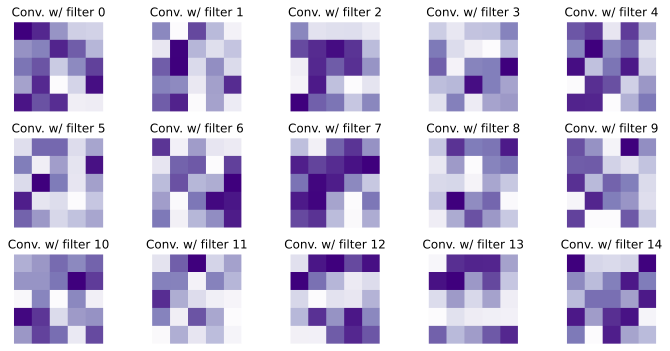

In [14]:
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  #ax.set_title('L1(0)->L2(%s)'%i)
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

- In the begining the kernel values are selected at random and hence does not show any relation to the input image
- As the training progress it will represent some feature map from the input image.

### Convert Input image to tensor with torchvision

In [15]:
import torchvision.transforms as T

# remeber original image is 3 layers RGB
print('Original Image Shape', img.shape)
img_t = T.ToTensor()(img)
print("Input image size:", img_t.size()) # size = [3, 413, 413]
print('Tensor Shape',img_t.shape)

Original Image Shape (413, 413, 3)
Input image size: torch.Size([3, 413, 413])
Tensor Shape torch.Size([3, 413, 413])


In [16]:
img_t = img_t.unsqueeze(0) # image size = [1, 3, 413, 413]
img_t.shape

torch.Size([1, 3, 413, 413])

### Apply Convolution

In [17]:
convRes = c(img_t)
print(img.shape)
print(convRes.shape)

(413, 413, 3)
torch.Size([1, 15, 409, 409])


### Apply math to see the output size

- Notice the size of convRes is of size (409,409) from input size of (413,413)

In [18]:
import math

kernel_size  = 5  # kernel_size (int or tuple): Size of the convolving kernel
stride   = 1      # stride (int or tuple, optional): Stride of the convolution. Default: 1
padding  = 0      # padding (int, tuple or str, optional): Padding added to all four sides of the input. Default: 0


M = img.shape[0]  # input size of the image is 413x413
p = padding       # no padding is applied
S = stride        # stride is default to 1
K = kernel_size   # kernel size is 3x3

N = math.floor( (M + 2*p - K)/S ) + 1
print(N)

409


### Look at the Output Channels

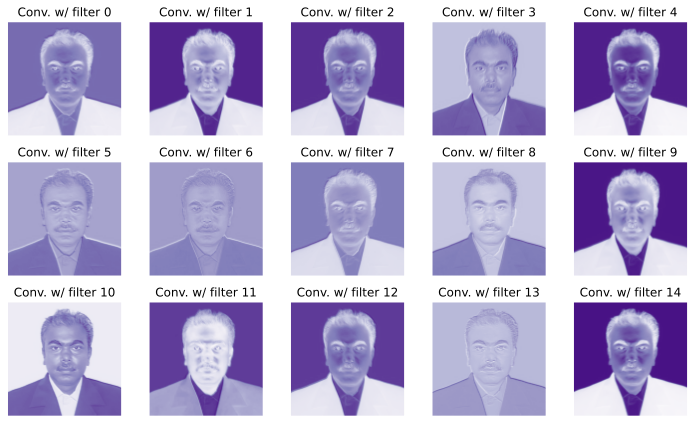

In [19]:
fig,axs = plt.subplots(3,5,figsize=(10,6))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

Each Of the Output Channel represents a feature map of the original input.

## Transpose Convolution

- Transpose Convolution is Opposite to normal Convolution
- It starts with each pixel in image and convolve with kernel and creates a larger output matrix

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/07_conv.jpg)

## Transpose Convolution Summary

- Transpose Convolution is scaler multiply a kernel with each pixel.
- As long as kernel is > 1, then the output is higher resolution than original image.
- Transpose convolution is used for higher resolution CNN
- Formula for transpose convolution size.

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/08_conv.jpg)

## Pooling

- Pooling reduces dimensionality
- Increase receptive field
- Max Pooling – Max of selected Matrix
- Min Pooling  - Min of selected Matrix
- Avg Pooling   - Mean of selected Matrix

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/09_conv.jpg)


## Receptive Field

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/10_conv.jpg)

### Receptive Field CNN with Pooling

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/11_conv.jpg)

## Convolution Stride Or Pooling


![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/12_conv.jpg)

## Convolution Stride v/s Convolution + Pooling

![Padding Example](https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/13_conv.jpg)

## Conclusion

- We Implemented Convolution in Our **Custom Convolution Function** (calcconv2d)
- Compared convolution output from Our Custom Function v/s **Scipy Convolution Function**
- We Used **torch.nn.functional.conv2d** function and looked at the convolution output.
- Explored Padding and Stride in Convolution
- Explored **torch.nn.Conv2d** and applied convolution with 3 layer input and 15 layer output channel.
- Explored **Transpose Convolution**
- Discussed on **Pooling**
- **Receptive Field**
- Compared **Convolution Stride v/s Convolution + Pooling**